## Playing with Graphics
Looking at two different ways of plotting a rather complex grouping of information.

### New idea:
Rather than displaying the log10 p-values, take the ratio of `(standardized p-value / regular p-value)` and then display the median andintervals for those ratios. Note these p-values are not logged.

In [1]:
import sys, numpy as np
sys.path.append('/Users/mikewu/Desktop/Research/persist-homology/')
import sub_parse
reload(sub_parse)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
def safelog10(B, noise=1e-5):
    B[B == 0] += noise
    return np.log10(B)

def get_align_dict(keys, step=0.01):
    alignment_hash = {}
    mid_pt = len(allkeys) / 2
    base_val = mid_pt * -step
    for i, key in enumerate(allkeys):
        alignment_hash[key] = base_val
        base_val += step
    return alignment_hash

def hard_line_plot(allkeys, 
                   allticks, 
                   allcolors,
                   bighash,
                   custom_ylim=None,
                   save_path=None):

    xvalues = np.arange(0.1, 0.35, 0.05)
    align_values = get_align_dict(allkeys, 0.005)
    matplotlib.rc('xtick', labelsize=27) 
    matplotlib.rc('ytick', labelsize=27) 
    fig, ax = plt.subplots(figsize=(20,5))
    plt.ylabel('log10 p-value', fontsize=40)
    plt.xlabel('PercFil', fontsize=40)

    for it in range(5):
        store_error_max = []
        store_error_min = []

        for k, c, t in zip(allkeys, allcolors, allticks):
            xvalue = xvalues[it] + align_values[k]
            yvalue = [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]][it]
            lower_error = [np.percentile(np.log10(np.exp(i)), 25) for i in bighash[k]]
            upper_error = [np.percentile(np.log10(np.exp(i)), 75) for i in bighash[k]]
            store_error_min.append(lower_error[it])
            store_error_max.append(upper_error[it])

        store_error_min = np.array(store_error_min)
        store_error_max = np.array(store_error_max)

        for k, c, t in zip(allkeys, allcolors, allticks):
            xvalue = xvalues[it] + align_values[k]
            yvalue = [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]][it]

            lower_error = [np.percentile(np.log10(np.exp(i)), 25) for i in bighash[k]]
            upper_error = [np.percentile(np.log10(np.exp(i)), 75) for i in bighash[k]]

            pos = [xvalue]
            ypt = [yvalue]
            err = [[yvalue - lower_error[it]], [upper_error[it] - yvalue]]
            plt.errorbar(pos, 
                         ypt, 
                         yerr=err, 
                         lw=6, 
                         alpha=0.4,
                         color=c, 
                         capsize=20, 
                         capthick=6)

        for k, c, t in zip(allkeys, allcolors, allticks):
            xvalue = xvalues[it] + align_values[k]
            yvalue = [np.percentile(np.log10(np.exp(i)), 50) for i in bighash[k]][it]
            plt.scatter([xvalue],
                        [yvalue],
                        color=c,
                        marker='o',
                        alpha=1,
                        s=300)


    # put it here so dots are the legend
    plt.legend(allticks, fontsize=30, loc='lower left')    

    ax.xaxis.grid(False)
    plt.tick_params(axis='both', which='major', labelsize=35)
    plt.tight_layout()
    plt.xlim(0.02, 0.33)

    ax.set_xticklabels([0.00, '', '10%', '15%', '20%', '25%', '30%'])
    
    if not custom_ylim is None:
        plt.ylim(custom_ylim[0], custom_ylim[1])
    
    if save_path:
        plt.savefig(save_path)
    else:
        plt.show()

# allkeys = ['euler', 'all-euler', 'indiv-euler-dim-0', 'indiv-euler-dim-1', 'indiv-euler-dim-2']
# allticks = ['EC', 'EC (0:2)', 'EC (0)', 'EC (1)', 'EC (2)']
# allcolors = ['#44B3C2', '#F1A94E', '#E45641', '#5D4C46', '#7B8D8E']
# hard_line_plot(allkeys, allticks, allcolors, bighash, custom_ylim=[-7, 1])

In [3]:
name = '/Users/mikewu/Desktop/Research/persist-homology/saved_states/large_sub_set_test/results-'
norm = 'False'
base = '0.1'
paths = [name+str(i)+'-'+base+'baseNorm'+norm+'.txt' for i in range(1, 101)]
singles = ['all-silh', 'euler', 'all-euler', 'silh-euler']
doubles = ['indiv_silh', 'indiv-euler', 'contour']

resArr = np.array([sub_parse.parse(f) for f in paths])

bighash_no_norm = {}
for characteristic in singles:
    bighash_no_norm[characteristic] = sub_parse.prepare1d(resArr, characteristic)
    
for characteristic in doubles:
    for dim in [0,1,2]:
        bighash_no_norm[characteristic+'-dim-'+str(dim)] = sub_parse.prepare2d(
            resArr, characteristic, dim)

In [4]:
name = '/Users/mikewu/Desktop/Research/persist-homology/saved_states/large_sub_set_test/results-'
norm = 'True'
base = '0.1'
paths = [name+str(i)+'-'+base+'baseNorm'+norm+'.txt' for i in range(1, 101)]
singles = ['all-silh', 'euler', 'all-euler', 'silh-euler']
doubles = ['indiv_silh', 'indiv-euler', 'contour']

resArr = np.array([sub_parse.parse(f) for f in paths])

bighash_yes_norm = {}
for characteristic in singles:
    bighash_yes_norm[characteristic] = sub_parse.prepare1d(resArr, characteristic)
    
for characteristic in doubles:
    for dim in [0,1,2]:
        bighash_yes_norm[characteristic+'-dim-'+str(dim)] = sub_parse.prepare2d(
            resArr, characteristic, dim)

---

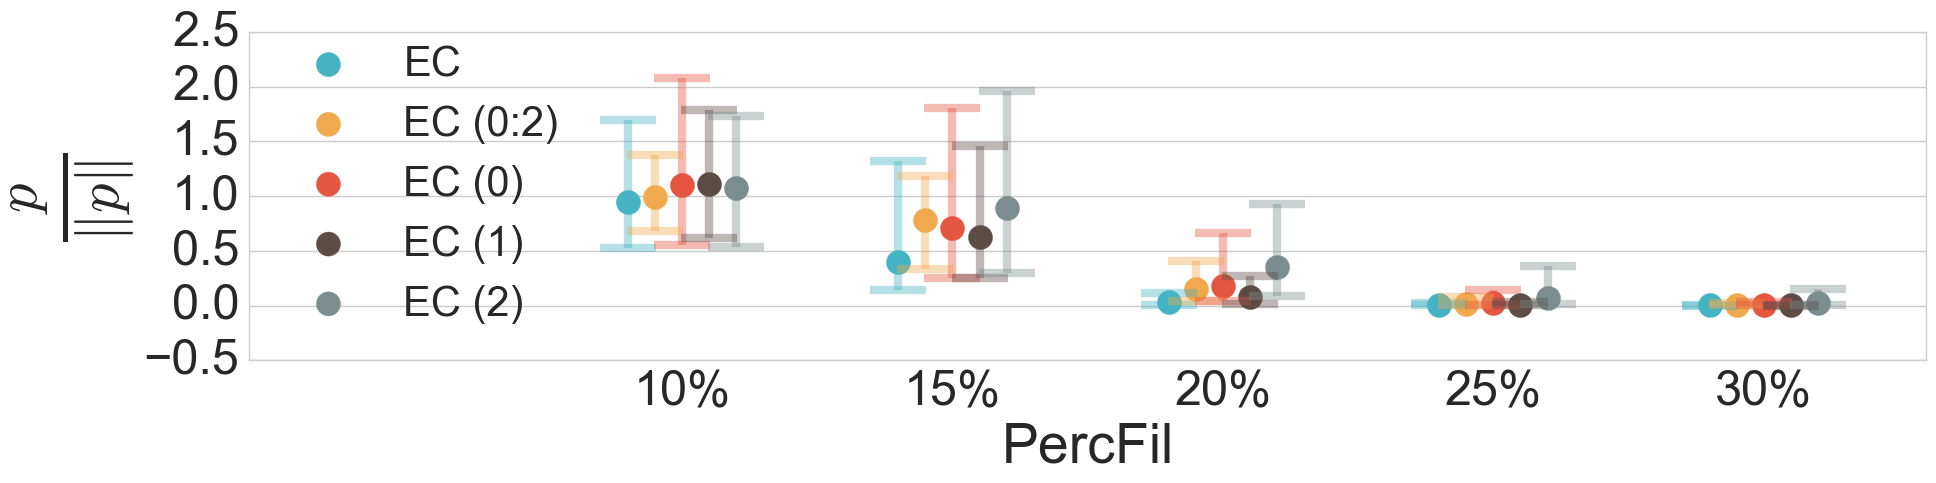

In [32]:
allkeys = ['euler', 'all-euler', 'indiv-euler-dim-0', 'indiv-euler-dim-1', 'indiv-euler-dim-2']
allticks = ['EC', 'EC (0:2)', 'EC (0)', 'EC (1)', 'EC (2)']
allcolors = ['#44B3C2', '#F1A94E', '#E45641', '#5D4C46', '#7B8D8E']

xvalues = np.arange(0.1, 0.35, 0.05)
align_values = get_align_dict(allkeys, 0.005)
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 
fig, ax = plt.subplots(figsize=(20,5))
plt.ylabel(r'$\frac{p}{\|p\|}$', fontsize=60)
plt.xlabel('PercFil', fontsize=40)

for it in range(5):
    for k, c, t in zip(allkeys, allcolors, allticks):
        xvalue = xvalues[it] + align_values[k]
        y_value_no_norm = np.exp(bighash_no_norm[k][it])
        y_value_yes_norm = np.exp(bighash_yes_norm[k][it])
        # y_value = np.divide(y_value_yes_norm, y_value_no_norm)
        y_value = np.divide(y_value_no_norm, y_value_yes_norm)
        
        lower_error = np.percentile(y_value, 25)
        upper_error = np.percentile(y_value, 75)
        median_y_value = np.percentile(y_value, 50)

        pos = [xvalue]
        ypt = [median_y_value]
        err = [[median_y_value - lower_error], [upper_error - median_y_value]]
        plt.errorbar(pos, 
                     ypt, 
                     yerr=err, 
                     lw=6, 
                     alpha=0.4,
                     color=c, 
                     capsize=20, 
                     capthick=6)

    for k, c, t in zip(allkeys, allcolors, allticks):
        xvalue = xvalues[it] + align_values[k]
        y_value_no_norm = np.exp(bighash_no_norm[k][it])
        y_value_yes_norm = np.exp(bighash_yes_norm[k][it])
        # y_value = np.divide(y_value_yes_norm, y_value_no_norm)
        y_value = np.divide(y_value_no_norm, y_value_yes_norm)
        median_y_value = np.percentile(y_value, 50)
        
        plt.scatter([xvalue],
                    [median_y_value],
                    color=c,
                    marker='o',
                    alpha=1,
                    s=300)

# put it here so dots are the legend
plt.legend(allticks, fontsize=30, loc='lower left')    
ax.xaxis.grid(False)
plt.tick_params(axis='both', which='major', labelsize=35)
plt.tight_layout()
plt.xlim(0.02, 0.33)
ax.set_xticklabels([0.00, '', '10%', '15%', '20%', '25%', '30%'])
plt.show()